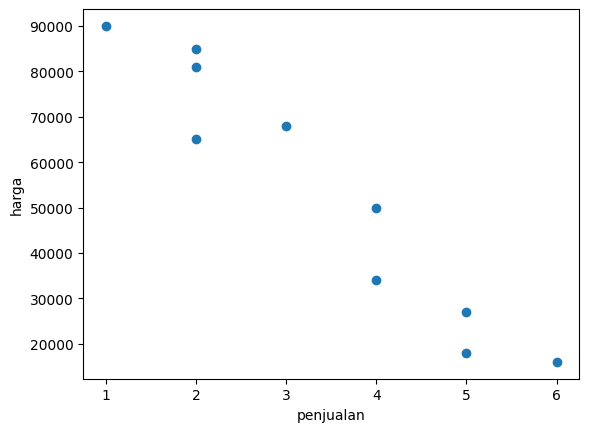

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000,18000,27000,34000,50000,68000,65000,81000,85000,90000])
%matplotlib inline
plt.scatter(penjualan,harga)
plt.xlabel('penjualan')
plt.ylabel('harga')
plt.show()

In [2]:
penjualan =  penjualan.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(penjualan,harga)

LinearRegression()

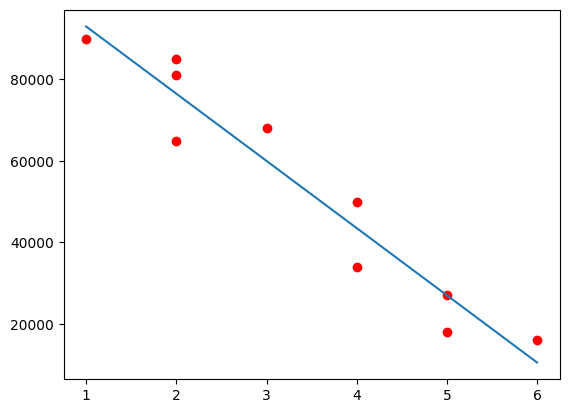

In [3]:
plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

In [4]:
import pandas as pd # Import the pandas library with the alias 'pd'
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()  # Ini untuk mengunggah file dari lokal

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


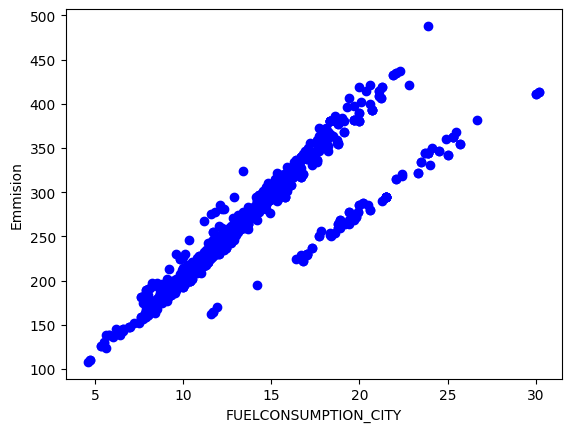

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emmision")
plt.show()

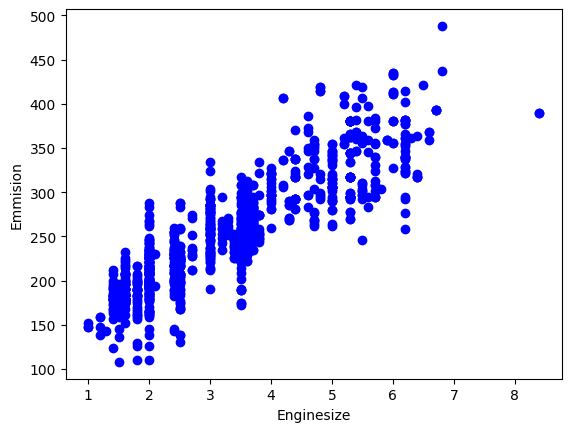

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emmision")
plt.show()

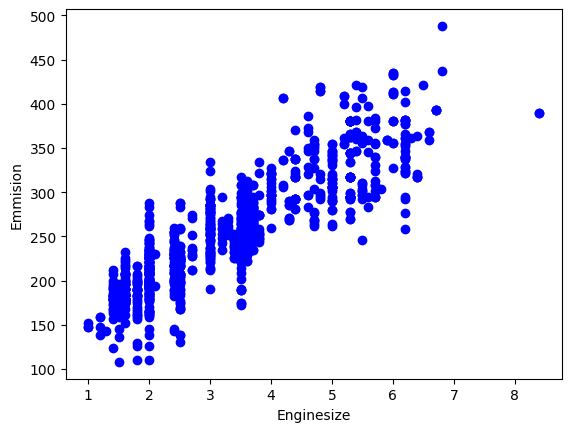

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emmision")
plt.show()

In [9]:
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.06717727]]
Intercept:  [125.59438467]


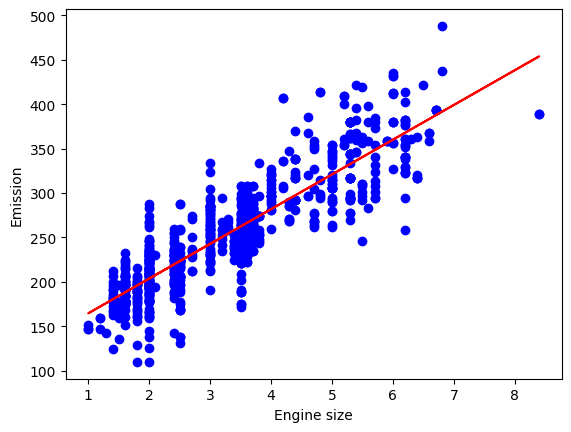

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean Absolute Error: 24.46
Residual sum of squares (MSE): 1020.92
R2-score: 0.67
